In [2]:
import numpy as np
from scipy.integrate import odeint, ode
import matplotlib.pyplot as plt

### Problema 7 Circuito RLC.

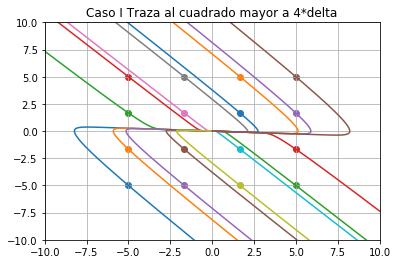

In [20]:
def RLC(t, z):
    x = z[0]
    y = z[1]
#     dxdt = 4*x+2*y
#     dydt = -17*x-5*y
    dxdt = y
    dydt = -((1/(L*C))*x + (R/L)*y)
    return [dxdt, dydt]


## ---------------------- ** -------------------- ##
R = 5
L = 4
C = 4
dt = 0.001
tmax = 80
t = np.arange(0, tmax, dt)
tpre = -80
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-5, 5, 4)
Yi = np.linspace(-5, 5, 4)
# Xi = [0.50]
# Yi = [8.23]
plt.figure()
for xi in Xi:
    for yi in Yi:
        plt.scatter(xi, yi)
        zi = [xi, yi]
        sol_fut = odeint(RLC, zi, t, tfirst=True)
        sol_pas = odeint(RLC, zi, tant, tfirst=True)
        x_fut = sol_fut[:, 0]
        x_pas = sol_pas[:, 0][::-1]
        xt = np.concatenate((x_pas, x_fut))
        y_fut = sol_fut[:, 1]
        y_pas = sol_pas[:, 1][::-1]
        yt = np.concatenate((y_pas, y_fut))
        plt.plot(xt, yt)
X = np.linspace(-10, 10, 8)
Y = np.linspace(-10, 10, 8)
XX, YY = np.meshgrid(X, Y)
DX, DY = RLC(0, [XX, YY])
# plt.streamplot(XX, YY, DX, DY, density=.5, minlength=.1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
## ---------------------- ** -------------------- ##
plt.title ("Caso I Traza al cuadrado mayor a 4*delta")
plt.grid ()
plt.show ()

### Problema 8 b

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


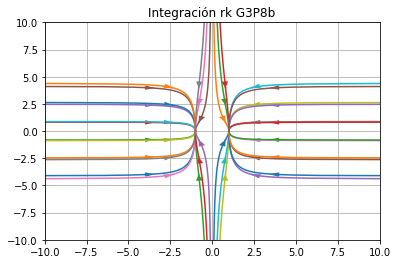

In [14]:
def f_b(t, z):
    x = z[0]
    y = z[1]
    dxdt = x-x**3
    dydt = -y
    return [dxdt, dydt]
## ---------------------- ** -------------------- ##
# Integración rk

dt = 0.01
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
# Este es un integrador. Integra la función "f" utilizando el método "dopri5". 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
solver = ode(f_b).set_integrator('dopri5')
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 6)
Yi = np.linspace(-4, 4, 6)
plt.figure()
for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        solver.set_initial_value(zi, 0)
        # Armo 2 arrays + lleno de ceros al principio y después lleno de "nan".
        xt = np.zeros_like(t)
        xt.fill(np.nan)
        yt = np.zeros_like(t)
        yt.fill(np.nan)
        
        for ix, tt in enumerate(t):
            xt[ix], yt[ix] = solver.integrate(t[ix]) # Supongo que aca comienzo a integrar la función "f".
        line = plt.plot(xt, yt)
        c = line[0].get_color()
        dxi, dyi = f_b(0, zi)
        plt.arrow(xi, yi, dxi*dt, dyi*dt, shape='full', lw=0,
                  length_includes_head=True, head_width=.4, color=c)
        
        # Lo mismo que antes pero ahora integro hacia el pasado.
        solver.set_initial_value(zi, 0)
        xant = np.zeros_like(tant)
        xant.fill(np.nan)
        yant = np.zeros_like(tant)
        yant.fill(np.nan)
        for ix, tt in enumerate(tant):
            xant[ix], yant[ix] = solver.integrate(tant[ix])
        plt.plot(xant, yant, color=c)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
## ---------------------- ** -------------------- ##

plt.title ("Integración rk G3P8b")
plt.grid ()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(-10, 10)

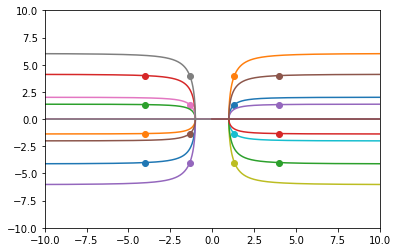

In [9]:
# Integracion odeint
dt = 0.0001
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
plt.figure()
for xi in Xi:
    for yi in Yi:
        plt.scatter(xi, yi)
        zi = [xi, yi]
        sol_fut = odeint(f_b, zi, t, tfirst=True)
        sol_pas = odeint(f_b, zi, tant, tfirst=True)
        x_fut = sol_fut[:, 0]
        x_pas = sol_pas[:, 0][::-1]
        xt = np.concatenate((x_pas, x_fut))
        y_fut = sol_fut[:, 1]
        y_pas = sol_pas[:, 1][::-1]
        yt = np.concatenate((y_pas, y_fut))
        plt.plot(xt, yt)
X = np.linspace(-10, 10, 8)
Y = np.linspace(-10, 10, 8)
XX, YY = np.meshgrid(X, Y)
DX, DY = f_b(0, [XX, YY])
# plt.streamplot(XX, YY, DX, DY, density=.5, minlength=.1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

### Problema 8 c

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


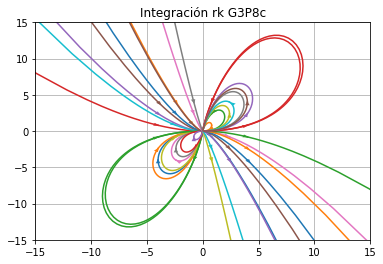

In [23]:
def f_c(t, z):
    x = z[0]
    y = z[1]
    dxdt = x*(x-y)
    dydt = y*(2*x-y)
    return [dxdt, dydt]
## ---------------------- ** -------------------- ##
# Integración rk

dt = 0.01
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
# Este es un integrador. Integra la función "f" utilizando el método "dopri5". 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
solver = ode(f_c).set_integrator('dopri5')
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 6)
Yi = np.linspace(-4, 4, 6)
plt.figure()
for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        solver.set_initial_value(zi, 0)
        # Armo 2 arrays + lleno de ceros al principio y después lleno de "nan".
        xt = np.zeros_like(t)
        xt.fill(np.nan)
        yt = np.zeros_like(t)
        yt.fill(np.nan)
        
        for ix, tt in enumerate(t):
            xt[ix], yt[ix] = solver.integrate(t[ix]) # Supongo que aca comienzo a integrar la función "f".
        line = plt.plot(xt, yt)
        c = line[0].get_color()
        dxi, dyi = f_c(0, zi)
        plt.arrow(xi, yi, dxi*dt, dyi*dt, shape='full', lw=0,
                  length_includes_head=True, head_width=.4, color=c)
        
        # Lo mismo que antes pero ahora integro hacia el pasado.
        solver.set_initial_value(zi, 0)
        xant = np.zeros_like(tant)
        xant.fill(np.nan)
        yant = np.zeros_like(tant)
        yant.fill(np.nan)
        for ix, tt in enumerate(tant):
            xant[ix], yant[ix] = solver.integrate(tant[ix])
        plt.plot(xant, yant, color=c)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
## ---------------------- ** -------------------- ##

plt.title ("Integración rk G3P8c")
plt.grid ()

### Problema 12.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


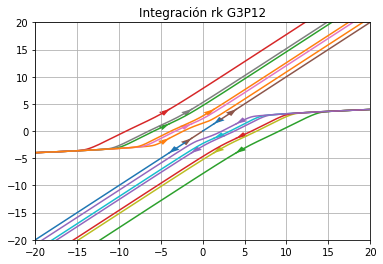

In [5]:
def f_c(t, z):
    x = z[0]
    y = z[1]
    dxdt = y**3 -4*x
    dydt = y**3-y-3*x
    return [dxdt, dydt]
## ---------------------- ** -------------------- ##
# Integración rk

dt = 0.001
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
# Este es un integrador. Integra la función "f" utilizando el método "dopri5". 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
solver = ode(f_c).set_integrator('dopri5')
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
plt.figure()
for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        solver.set_initial_value(zi, 0)
        # Armo 2 arrays + lleno de ceros al principio y después lleno de "nan".
        xt = np.zeros_like(t)
        xt.fill(np.nan)
        yt = np.zeros_like(t)
        yt.fill(np.nan)
        
        for ix, tt in enumerate(t):
            xt[ix], yt[ix] = solver.integrate(t[ix]) # Supongo que aca comienzo a integrar la función "f".
        line = plt.plot(xt, yt)
        c = line[0].get_color()
        dxi, dyi = f_c(0, zi)
        plt.arrow(xi, yi, dxi*dt, dyi*dt, shape='full', lw=0,
                  length_includes_head=True, head_width=.9, color=c)
        
        # Lo mismo que antes pero ahora integro hacia el pasado.
        solver.set_initial_value(zi, 0)
        xant = np.zeros_like(tant)
        xant.fill(np.nan)
        yant = np.zeros_like(tant)
        yant.fill(np.nan)
        for ix, tt in enumerate(tant):
            xant[ix], yant[ix] = solver.integrate(tant[ix])
        plt.plot(xant, yant, color=c)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
## ---------------------- ** -------------------- ##

plt.title ("Integración rk G3P12")
plt.grid ()